In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import datetime
import requests
import statsmodels.api as sm
from sklearn.svm import LinearSVC
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from itertools import combinations
from collections import OrderedDict 
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import re
import nltk
import math
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

%matplotlib inline

/Users/scottlew/miniconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# data from learning R by Richard Cotton learningr package in R
df = pd.read_csv("obama2008.csv")

In [3]:
df.head(10)

,Unnamed: 0,State,Region,Obama,McCain,Turnout,Unemployment,Income,Population,Catholic,Protestant,Other,Non.religious,Black,Latino,Urbanization
0,1,Alabama,IV,38.74,60.32,61.6,5.9,22732,4802982,6.0,80.0,1.0,11.0,26.2,3.9,94.4
1,2,Alaska,X,37.89,59.42,68.0,6.6,29382,721523,NaN,NaN,NaN,NaN,3.3,5.5,1.2
2,3,Arizona,IX,44.91,53.39,55.7,7.1,25203,6412700,29.0,44.0,5.0,17.0,4.1,16.3,56.3
3,4,Arkansas,VI,38.86,58.72,53.1,5.8,20977,2926229,8.0,79.0,1.0,8.0,14.4,6.4,56.0
4,5,California,IX,60.94,36.91,62.0,8.2,29020,37341989,37.0,35.0,5.0,18.0,6.2,37.6,239.1
5,6,Colorado,VIII,53.66,44.71,70.8,5.4,29679,5044930,21.0,49.0,4.0,21.0,4.0,20.7,48.5
6,7,Connecticut,I,60.59,38.22,NaN,6.2,36468,3581628,38.0,36.0,8.0,14.0,10.1,13.4,738.1
7,8,District of Columbia,III,92.46,6.53,62.0,7.4,40846,601723,13.0,59.0,6.0,18.0,50.7,9.1,9856.5
8,9,Delaware,III,61.91,36.93,66.7,5.9,28935,900877,26.0,48.0,1.0,23.0,21.4,8.2,460.8
9,10,Florida,IV,50.91,48.10,67.4,7.3,26503,18900773,27.0,49.0,4.0,14.0,16.0,22.5,350.6


In [4]:
df.tail()

,Unnamed: 0,State,Region,Obama,McCain,Turnout,Unemployment,Income,Population,Catholic,Protestant,Other,Non.religious,Black,Latino,Urbanization
46,47,Virginia,III,52.63,46.33,68.0,4.5,31606,8037736,11.0,65.0,4.0,15.0,19.4,7.9,202.6
47,48,Washington,X,57.34,40.26,67.3,6.2,29320,6753369,16.0,48.0,5.0,25.0,3.6,11.2,101.2
48,49,West Virginia,III,42.51,55.60,52.0,4.6,20891,1859815,7.0,70.0,2.0,15.0,3.4,1.2,77.1
49,50,Wisconsin,V,56.22,42.31,72.5,5.4,26447,5698230,29.0,47.0,4.0,15.0,6.3,5.9,105.0
50,51,Wyoming,VIII,32.54,64.78,64.9,3.5,26925,563626,13.0,54.0,1.0,28.0,0.8,8.9,5.8


In [5]:
df.shape

(51, 16)

In [6]:
df.dtypes

Unnamed: 0         int64
State             object
Region            object
Obama            float64
McCain           float64
Turnout          float64
Unemployment     float64
Income             int64
Population         int64
Catholic         float64
Protestant       float64
Other            float64
Non.religious    float64
Black            float64
Latino           float64
Urbanization     float64
dtype: object

In [7]:
df.columns

Index(['Unnamed: 0', 'State', 'Region', 'Obama', 'McCain', 'Turnout',
       'Unemployment', 'Income', 'Population', 'Catholic', 'Protestant',
       'Other', 'Non.religious', 'Black', 'Latino', 'Urbanization'],
      dtype='object')

In [8]:
df.drop('Unnamed: 0',axis=1, inplace = True)

In [9]:
df.head()

,State,Region,Obama,McCain,Turnout,Unemployment,Income,Population,Catholic,Protestant,Other,Non.religious,Black,Latino,Urbanization
0,Alabama,IV,38.74,60.32,61.6,5.9,22732,4802982,6.0,80.0,1.0,11.0,26.2,3.9,94.4
1,Alaska,X,37.89,59.42,68.0,6.6,29382,721523,NaN,NaN,NaN,NaN,3.3,5.5,1.2
2,Arizona,IX,44.91,53.39,55.7,7.1,25203,6412700,29.0,44.0,5.0,17.0,4.1,16.3,56.3
3,Arkansas,VI,38.86,58.72,53.1,5.8,20977,2926229,8.0,79.0,1.0,8.0,14.4,6.4,56.0
4,California,IX,60.94,36.91,62.0,8.2,29020,37341989,37.0,35.0,5.0,18.0,6.2,37.6,239.1


In [10]:
df.describe()

,Obama,McCain,Turnout,Unemployment,Income,Population,Catholic,Protestant,Other,Non.religious,Black,Latino,Urbanization
count,51.000000,51.000000,47.000000,51.000000,51.000000,5.100000e+01,49.000000,49.000000,49.000000,49.000000,51.000000,51.000000,51.000000
mean,51.289412,47.000392,64.093617,6.009804,26580.431373,6.074128e+06,21.673469,53.836735,3.285714,16.040816,11.101961,10.319608,385.639216
std,11.093797,10.990748,5.735375,1.423834,4250.667906,6.845363e+06,10.709007,14.554992,1.802776,6.137179,11.014363,9.539917,1377.962423
min,32.540000,6.530000,50.800000,3.400000,19534.000000,5.636260e+05,6.000000,26.000000,0.000000,5.000000,0.400000,1.200000,1.200000
25%,42.755000,40.390000,61.050000,5.050000,23501.000000,1.702662e+06,12.000000,46.000000,2.000000,12.000000,3.100000,4.300000,45.800000
50%,51.380000,46.800000,64.900000,5.900000,25203.000000,4.350606e+06,21.000000,54.000000,3.000000,15.000000,7.400000,8.200000,101.200000
75%,57.335000,55.885000,67.950000,7.250000,28977.500000,6.656506e+06,29.000000,62.000000,4.000000,19.000000,15.200000,12.050000,221.450000
max,92.460000,65.650000,78.000000,9.400000,40846.000000,3.734199e+07,46.000000,80.000000,8.000000,34.000000,50.700000,46.300000,9856.500000


In [11]:
top_10 = df.sort_values(['Turnout'],ascending = False).head(10)
top_10

,State,Region,Obama,McCain,Turnout,Unemployment,Income,Population,Catholic,Protestant,Other,Non.religious,Black,Latino,Urbanization
23,Minnesota,V,54.06,43.82,78.0,5.9,29431,5314879,29.0,51.0,4.0,12.0,5.2,4.7,66.6
49,Wisconsin,V,56.22,42.31,72.5,5.4,26447,5698230,29.0,47.0,4.0,15.0,6.3,5.9,105.0
19,Maine,I,57.71,40.38,72.2,6.0,24980,1333074,22.0,47.0,3.0,25.0,1.2,1.3,43.1
29,New Hampshire,I,54.13,44.52,71.9,4.3,30640,1321445,32.0,30.0,2.0,29.0,1.1,2.8,147.0
5,Colorado,VIII,53.66,44.71,70.8,5.4,29679,5044930,21.0,49.0,4.0,21.0,4.0,20.7,48.5
15,Iowa,VII,53.93,44.39,70.0,4.7,25060,3053787,22.0,54.0,4.0,15.0,2.9,5.0,54.5
22,Michigan,V,57.33,40.89,68.9,9.4,25172,9911626,20.0,55.0,3.0,16.0,14.2,4.4,174.8
25,Missouri,VII,49.23,49.36,68.7,6.8,24423,6011478,18.0,61.0,3.0,14.0,11.6,3.5,87.1
37,Oregon,X,56.75,40.40,68.1,7.7,25893,3848606,14.0,52.0,3.0,24.0,1.8,11.7,39.9
1,Alaska,X,37.89,59.42,68.0,6.6,29382,721523,NaN,NaN,NaN,NaN,3.3,5.5,1.2


In [12]:
top_10_unemployed = df.sort_values(['Unemployment'],ascending = False).head(10)
top_10_unemployed

,State,Region,Obama,McCain,Turnout,Unemployment,Income,Population,Catholic,Protestant,Other,Non.religious,Black,Latino,Urbanization
22,Michigan,V,57.33,40.89,68.9,9.4,25172,9911626,20.0,55.0,3.0,16.0,14.2,4.4,174.8
39,Rhode Island,I,62.86,35.06,62.4,8.7,28638,1055247,46.0,28.0,2.0,19.0,5.7,12.4,1081.1
4,California,IX,60.94,36.91,62.0,8.2,29020,37341989,37.0,35.0,5.0,18.0,6.2,37.6,239.1
28,Nevada,IX,55.15,42.65,58.8,8.1,27395,2709432,23.0,41.0,4.0,24.0,8.1,26.5,24.6
40,South Carolina,IV,44.90,53.87,58.7,8.0,23196,4645975,10.0,73.0,2.0,10.0,27.9,5.1,153.9
37,Oregon,X,56.75,40.40,68.1,7.7,25893,3848606,14.0,52.0,3.0,24.0,1.8,11.7,39.9
42,Tennessee,IV,41.79,56.85,57.4,7.4,23557,6375431,7.0,76.0,3.0,9.0,16.7,4.6,153.9
7,District of Columbia,III,92.46,6.53,62.0,7.4,40846,601723,13.0,59.0,6.0,18.0,50.7,9.1,9856.5
17,Kentucky,IV,41.15,57.37,58.9,7.4,22284,4350606,14.0,66.0,1.0,13.0,7.8,3.1,109.9
33,North Carolina,IV,49.70,49.38,66.8,7.3,24547,9565781,9.0,73.0,2.0,10.0,21.5,8.4,196.1


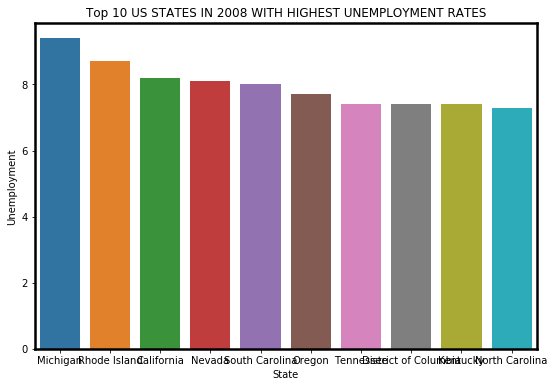

In [13]:
#sns.barplot(df.review_scores_rating)
fig, ax = plt.subplots(figsize=(9, 6))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.5)
sns.barplot(x="State", y="Unemployment", data=top_10_unemployed )
plt.title("Top 10 US STATES IN 2008 WITH HIGHEST UNEMPLOYMENT RATES")
#plt.ylim((85,110))

In [14]:
bottom_10_unemployed = df.sort_values(['Unemployment'],ascending = True).head(10)
bottom_10_unemployed

,State,Region,Obama,McCain,Turnout,Unemployment,Income,Population,Catholic,Protestant,Other,Non.religious,Black,Latino,Urbanization
34,North Dakota,VIII,44.50,53.15,65.3,3.4,24978,675905,28.0,62.0,0.0,7.0,1.2,2.0,9.7
50,Wyoming,VIII,32.54,64.78,64.9,3.5,26925,563626,13.0,54.0,1.0,28.0,0.8,8.9,5.8
27,Nebraska,VII,41.60,56.53,64.2,3.5,24568,1831825,22.0,53.0,3.0,17.0,4.5,9.2,23.8
41,South Dakota,VIII,44.75,53.16,65.0,3.5,23445,819761,19.0,59.0,4.0,12.0,1.3,2.7,10.7
36,Oklahoma,VI,34.35,65.65,56.8,4.1,22561,3764882,7.0,73.0,2.0,11.0,7.4,8.9,54.7
29,New Hampshire,I,54.13,44.52,71.9,4.3,30640,1321445,32.0,30.0,2.0,29.0,1.1,2.8,147.0
44,Utah,VIII,34.22,62.24,55.6,4.3,22684,2770765,7.0,71.0,1.0,14.0,1.1,13.0,33.6
46,Virginia,III,52.63,46.33,68.0,4.5,31606,8037736,11.0,65.0,4.0,15.0,19.4,7.9,202.6
48,West Virginia,III,42.51,55.60,52.0,4.6,20891,1859815,7.0,70.0,2.0,15.0,3.4,1.2,77.1
15,Iowa,VII,53.93,44.39,70.0,4.7,25060,3053787,22.0,54.0,4.0,15.0,2.9,5.0,54.5


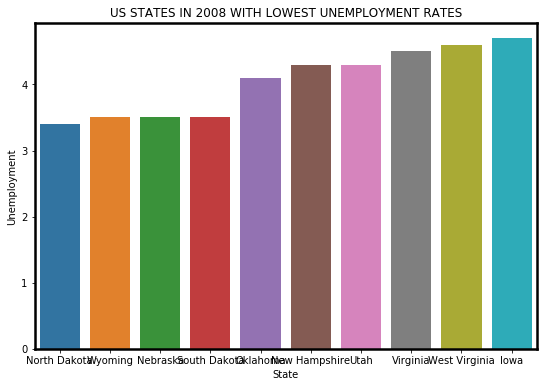

In [15]:
#sns.barplot(df.review_scores_rating)
fig, ax = plt.subplots(figsize=(9, 6))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.5)
sns.barplot(x="State", y="Unemployment", data=bottom_10_unemployed )
plt.title("US STATES IN 2008 WITH LOWEST UNEMPLOYMENT RATES")
#plt.ylim((85,110))

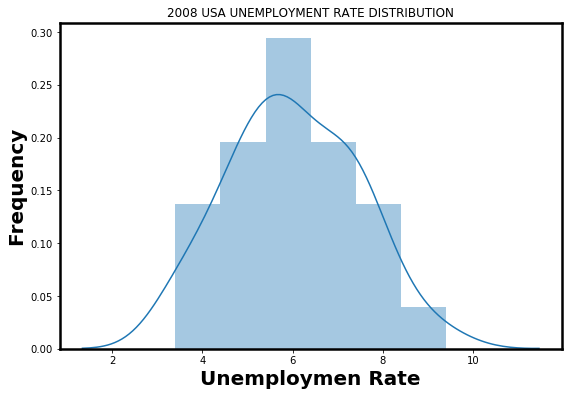

In [16]:
#sns.distplot(df.review_scores_rating)
fig, ax = plt.subplots(figsize=(9, 6))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.5)
sns.distplot(df.Unemployment)
plt.title("2008 USA UNEMPLOYMENT RATE DISTRIBUTION")
plt.xlabel('Unemploymen Rate',weight = 'bold',size =20)
plt.ylabel('Frequency',weight = 'bold',size =20)

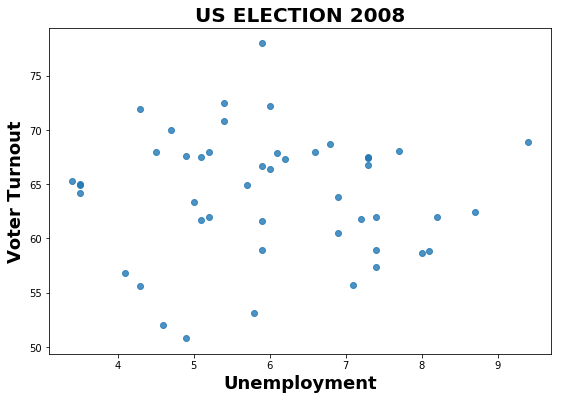

In [17]:
plt.figure(figsize = [9,6]) # [width, height]
plt.title('US ELECTION 2008',weight = 'bold', size =20)
sns.regplot(x="Unemployment", y="Turnout", data = df,fit_reg = False)
plt.xlabel('Unemployment', weight = 'bold',size =18)
plt.ylabel('Voter Turnout', weight = 'bold', size=18)

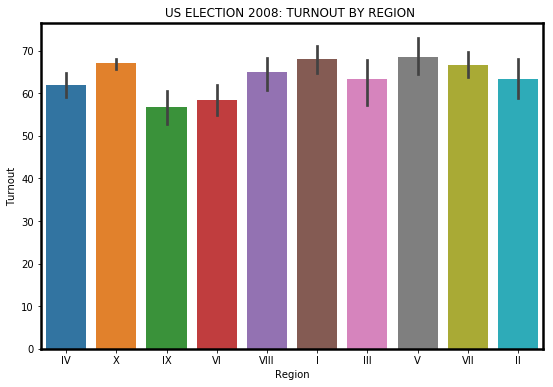

In [18]:
#sns.barplot(df.review_scores_rating)
fig, ax = plt.subplots(figsize=(9, 6))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.5)
sns.barplot(x="Region", y="Turnout", data=df )
plt.title("US ELECTION 2008: TURNOUT BY REGION ")
#plt.ylim((85,110))

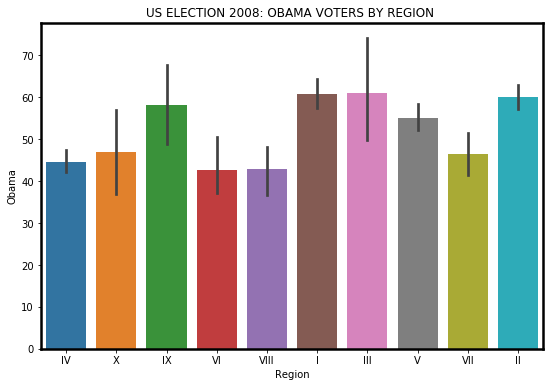

In [19]:
#sns.barplot(df.review_scores_rating)
fig, ax = plt.subplots(figsize=(9, 6))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.5)
sns.barplot(x="Region", y="Obama", data=df)
plt.title("US ELECTION 2008: OBAMA VOTERS BY REGION ")
#plt.ylim((85,110))

In [20]:
df.columns

Index(['State', 'Region', 'Obama', 'McCain', 'Turnout', 'Unemployment',
       'Income', 'Population', 'Catholic', 'Protestant', 'Other',
       'Non.religious', 'Black', 'Latino', 'Urbanization'],
      dtype='object')

In [21]:
df2 =  df[['Obama','McCain', 'Turnout', 'Unemployment','Non.religious','Urbanization']]

In [22]:
df2.head()

,Obama,McCain,Turnout,Unemployment,Non.religious,Urbanization
0,38.74,60.32,61.6,5.9,11.0,94.4
1,37.89,59.42,68.0,6.6,NaN,1.2
2,44.91,53.39,55.7,7.1,17.0,56.3
3,38.86,58.72,53.1,5.8,8.0,56.0
4,60.94,36.91,62.0,8.2,18.0,239.1


In [23]:
df2.shape

(51, 6)

In [24]:
df2.corr()

,Obama,McCain,Turnout,Unemployment,Non.religious,Urbanization
Obama,1.000000,-0.998119,0.203964,0.289740,0.352649,0.600385
McCain,-0.998119,1.000000,-0.210898,-0.283865,-0.381189,-0.594689
Turnout,0.203964,-0.210898,1.000000,-0.030580,0.344905,-0.040682
Unemployment,0.289740,-0.283865,-0.030580,1.000000,-0.067669,0.186995
Non.religious,0.352649,-0.381189,0.344905,-0.067669,1.000000,0.049538
Urbanization,0.600385,-0.594689,-0.040682,0.186995,0.049538,1.000000


In [25]:
df[df['State'] == 'New York']

,State,Region,Obama,McCain,Turnout,Unemployment,Income,Population,Catholic,Protestant,Other,Non.religious,Black,Latino,Urbanization
32,New York,II,62.88,36.03,58.9,5.9,30634,19421055,37.0,34.0,8.0,14.0,15.9,17.6,411.2


In [26]:
df[df['State'] == 'Ohio']

,State,Region,Obama,McCain,Turnout,Unemployment,Income,Population,Catholic,Protestant,Other,Non.religious,Black,Latino,Urbanization
35,Ohio,V,51.38,46.8,67.5,7.3,24830,11568495,20.0,56.0,3.0,17.0,12.2,3.1,282.3


In [27]:
df[df['State'] == 'Minnesota']

,State,Region,Obama,McCain,Turnout,Unemployment,Income,Population,Catholic,Protestant,Other,Non.religious,Black,Latino,Urbanization
23,Minnesota,V,54.06,43.82,78.0,5.9,29431,5314879,29.0,51.0,4.0,12.0,5.2,4.7,66.6


In [28]:
top_10_Catholic = df.sort_values(['Catholic'],ascending = False).head(10)
top_10_Catholic

,State,Region,Obama,McCain,Turnout,Unemployment,Income,Population,Catholic,Protestant,Other,Non.religious,Black,Latino,Urbanization
39,Rhode Island,I,62.86,35.06,62.4,8.7,28638,1055247,46.0,28.0,2.0,19.0,5.7,12.4,1081.1
30,New Jersey,II,57.14,41.61,67.9,6.1,34556,8807501,42.0,30.0,7.0,15.0,13.7,17.7,1195.5
21,Massachusetts,I,61.80,35.99,66.4,6.0,33460,6559644,39.0,26.0,5.0,22.0,6.6,9.6,839.4
6,Connecticut,I,60.59,38.22,NaN,6.2,36468,3581628,38.0,36.0,8.0,14.0,10.1,13.4,738.1
4,California,IX,60.94,36.91,62.0,8.2,29020,37341989,37.0,35.0,5.0,18.0,6.2,37.6,239.1
32,New York,II,62.88,36.03,58.9,5.9,30634,19421055,37.0,34.0,8.0,14.0,15.9,17.6,411.2
31,New Mexico,VI,56.91,41.78,62.0,5.2,22461,2067273,33.0,41.0,3.0,16.0,2.1,46.3,17.0
29,New Hampshire,I,54.13,44.52,71.9,4.3,30640,1321445,32.0,30.0,2.0,29.0,1.1,2.8,147.0
13,Illinois,V,61.85,36.74,63.8,6.9,28469,12864380,32.0,45.0,3.0,13.0,14.5,15.8,231.1
43,Texas,VI,43.63,55.39,NaN,5.4,24318,25268418,32.0,48.0,2.0,12.0,11.8,37.6,96.3


In [29]:
top_10_Black = df.sort_values(['Black'],ascending = False).head(10)
top_10_Black

,State,Region,Obama,McCain,Turnout,Unemployment,Income,Population,Catholic,Protestant,Other,Non.religious,Black,Latino,Urbanization
7,District of Columbia,III,92.46,6.53,62.0,7.4,40846,601723,13.0,59.0,6.0,18.0,50.7,9.1,9856.5
24,Mississippi,IV,43.00,56.17,NaN,7.3,19534,2978240,11.0,80.0,1.0,5.0,37.0,2.7,63.2
18,Louisiana,VI,39.93,58.56,61.7,5.1,22535,4553962,31.0,57.0,1.0,8.0,32.0,4.2,104.9
10,Georgia,IV,46.90,52.10,61.8,7.2,25098,9727566,9.0,72.0,4.0,9.0,30.5,8.8,168.4
20,Maryland,III,61.92,36.47,68.0,5.2,34236,5789929,27.0,49.0,6.0,13.0,29.4,8.2,594.8
40,South Carolina,IV,44.90,53.87,58.7,8.0,23196,4645975,10.0,73.0,2.0,10.0,27.9,5.1,153.9
0,Alabama,IV,38.74,60.32,61.6,5.9,22732,4802982,6.0,80.0,1.0,11.0,26.2,3.9,94.4
33,North Carolina,IV,49.70,49.38,66.8,7.3,24547,9565781,9.0,73.0,2.0,10.0,21.5,8.4,196.1
8,Delaware,III,61.91,36.93,66.7,5.9,28935,900877,26.0,48.0,1.0,23.0,21.4,8.2,460.8
46,Virginia,III,52.63,46.33,68.0,4.5,31606,8037736,11.0,65.0,4.0,15.0,19.4,7.9,202.6


In [30]:
top_10_NoReligion = df.sort_values(['Non.religious'],ascending = False).head(10)
top_10_NoReligion

,State,Region,Obama,McCain,Turnout,Unemployment,Income,Population,Catholic,Protestant,Other,Non.religious,Black,Latino,Urbanization
45,Vermont,I,67.46,30.45,67.6,4.9,27036,630337,26.0,29.0,4.0,34.0,1.0,1.5,67.9
29,New Hampshire,I,54.13,44.52,71.9,4.3,30640,1321445,32.0,30.0,2.0,29.0,1.1,2.8,147.0
50,Wyoming,VIII,32.54,64.78,64.9,3.5,26925,563626,13.0,54.0,1.0,28.0,0.8,8.9,5.8
47,Washington,X,57.34,40.26,67.3,6.2,29320,6753369,16.0,48.0,5.0,25.0,3.6,11.2,101.2
19,Maine,I,57.71,40.38,72.2,6.0,24980,1333074,22.0,47.0,3.0,25.0,1.2,1.3,43.1
37,Oregon,X,56.75,40.40,68.1,7.7,25893,3848606,14.0,52.0,3.0,24.0,1.8,11.7,39.9
28,Nevada,IX,55.15,42.65,58.8,8.1,27395,2709432,23.0,41.0,4.0,24.0,8.1,26.5,24.6
12,Idaho,X,35.91,61.21,64.9,5.7,22262,1573499,10.0,59.0,3.0,23.0,0.6,11.2,19.0
8,Delaware,III,61.91,36.93,66.7,5.9,28935,900877,26.0,48.0,1.0,23.0,21.4,8.2,460.8
21,Massachusetts,I,61.80,35.99,66.4,6.0,33460,6559644,39.0,26.0,5.0,22.0,6.6,9.6,839.4


## URBAN AREAS SEEM TO VOTE OVERWHELMINGLY FOR OBAMA/DEMOCRAT

In [31]:
top_10_Urban = df.sort_values(['Urbanization'],ascending = False).head(10)
top_10_Urban

,State,Region,Obama,McCain,Turnout,Unemployment,Income,Population,Catholic,Protestant,Other,Non.religious,Black,Latino,Urbanization
7,District of Columbia,III,92.46,6.53,62.0,7.4,40846,601723,13.0,59.0,6.0,18.0,50.7,9.1,9856.5
30,New Jersey,II,57.14,41.61,67.9,6.1,34556,8807501,42.0,30.0,7.0,15.0,13.7,17.7,1195.5
39,Rhode Island,I,62.86,35.06,62.4,8.7,28638,1055247,46.0,28.0,2.0,19.0,5.7,12.4,1081.1
21,Massachusetts,I,61.80,35.99,66.4,6.0,33460,6559644,39.0,26.0,5.0,22.0,6.6,9.6,839.4
6,Connecticut,I,60.59,38.22,NaN,6.2,36468,3581628,38.0,36.0,8.0,14.0,10.1,13.4,738.1
20,Maryland,III,61.92,36.47,68.0,5.2,34236,5789929,27.0,49.0,6.0,13.0,29.4,8.2,594.8
8,Delaware,III,61.91,36.93,66.7,5.9,28935,900877,26.0,48.0,1.0,23.0,21.4,8.2,460.8
32,New York,II,62.88,36.03,58.9,5.9,30634,19421055,37.0,34.0,8.0,14.0,15.9,17.6,411.2
9,Florida,IV,50.91,48.10,67.4,7.3,26503,18900773,27.0,49.0,4.0,14.0,16.0,22.5,350.6
38,Pennsylvania,III,54.47,44.15,NaN,5.9,26678,12734905,31.0,46.0,4.0,15.0,10.8,5.7,283.9


In [32]:
top_10_Rural = df.sort_values(['Urbanization'],ascending = True).head(10)
top_10_Rural

,State,Region,Obama,McCain,Turnout,Unemployment,Income,Population,Catholic,Protestant,Other,Non.religious,Black,Latino,Urbanization
1,Alaska,X,37.89,59.42,68.0,6.6,29382,721523,NaN,NaN,NaN,NaN,3.3,5.5,1.2
50,Wyoming,VIII,32.54,64.78,64.9,3.5,26925,563626,13.0,54.0,1.0,28.0,0.8,8.9,5.8
26,Montana,VIII,47.11,49.49,67.5,5.1,22881,994416,12.0,58.0,4.0,21.0,0.4,2.9,6.8
34,North Dakota,VIII,44.50,53.15,65.3,3.4,24978,675905,28.0,62.0,0.0,7.0,1.2,2.0,9.7
41,South Dakota,VIII,44.75,53.16,65.0,3.5,23445,819761,19.0,59.0,4.0,12.0,1.3,2.7,10.7
31,New Mexico,VI,56.91,41.78,62.0,5.2,22461,2067273,33.0,41.0,3.0,16.0,2.1,46.3,17.0
12,Idaho,X,35.91,61.21,64.9,5.7,22262,1573499,10.0,59.0,3.0,23.0,0.6,11.2,19.0
27,Nebraska,VII,41.60,56.53,64.2,3.5,24568,1831825,22.0,53.0,3.0,17.0,4.5,9.2,23.8
28,Nevada,IX,55.15,42.65,58.8,8.1,27395,2709432,23.0,41.0,4.0,24.0,8.1,26.5,24.6
44,Utah,VIII,34.22,62.24,55.6,4.3,22684,2770765,7.0,71.0,1.0,14.0,1.1,13.0,33.6


In [33]:
def blue_red(val):
    if val > 50:
        return 'Blue'
    else:
        return 'Red'

In [34]:
def party_label(p):
    if p == 'Blue':
        return 1
    else: 
        return 0
    

In [35]:
# I assume income is per capita for each state
def rich_poor(income):
    if income <= 28000:
        return 'Poor'
    else:
        return 'Rich'

In [36]:
print(blue_red(99))

Blue


In [37]:
df['Party'] = df.Obama.apply(blue_red)

In [38]:
df['Party_Label'] = df.Party.apply(party_label)

## CONVERT CONTINOUS VARIABLE (INCOME) INTO A CATEGORICAL FEATURE/VARIABLE

In [39]:
df['Status'] = df.Income.apply(rich_poor)

In [40]:
df[['State','Obama','Party','Party_Label','Status','Income']].head(12)

,State,Obama,Party,Party_Label,Status,Income
0,Alabama,38.74,Red,0,Poor,22732
1,Alaska,37.89,Red,0,Rich,29382
2,Arizona,44.91,Red,0,Poor,25203
3,Arkansas,38.86,Red,0,Poor,20977
4,California,60.94,Blue,1,Rich,29020
5,Colorado,53.66,Blue,1,Rich,29679
6,Connecticut,60.59,Blue,1,Rich,36468
7,District of Columbia,92.46,Blue,1,Rich,40846
8,Delaware,61.91,Blue,1,Rich,28935
9,Florida,50.91,Blue,1,Poor,26503


In [41]:
df[df['Status'] == 'Rich'].head()

,State,Region,Obama,McCain,Turnout,Unemployment,Income,Population,Catholic,Protestant,Other,Non.religious,Black,Latino,Urbanization,Party,Party_Label,Status
1,Alaska,X,37.89,59.42,68.0,6.6,29382,721523,NaN,NaN,NaN,NaN,3.3,5.5,1.2,Red,0,Rich
4,California,IX,60.94,36.91,62.0,8.2,29020,37341989,37.0,35.0,5.0,18.0,6.2,37.6,239.1,Blue,1,Rich
5,Colorado,VIII,53.66,44.71,70.8,5.4,29679,5044930,21.0,49.0,4.0,21.0,4.0,20.7,48.5,Blue,1,Rich
6,Connecticut,I,60.59,38.22,NaN,6.2,36468,3581628,38.0,36.0,8.0,14.0,10.1,13.4,738.1,Blue,1,Rich
7,District of Columbia,III,92.46,6.53,62.0,7.4,40846,601723,13.0,59.0,6.0,18.0,50.7,9.1,9856.5,Blue,1,Rich


In [42]:
df.columns

Index(['State', 'Region', 'Obama', 'McCain', 'Turnout', 'Unemployment',
       'Income', 'Population', 'Catholic', 'Protestant', 'Other',
       'Non.religious', 'Black', 'Latino', 'Urbanization', 'Party',
       'Party_Label', 'Status'],
      dtype='object')

In [43]:
df['Non.religious'].isnull().sum()

2

## REPLACE NAN VALUES IN NON.RELIGIOUS WITH MEAN VALUE

In [44]:
df[df['Non.religious'].isnull()]

,State,Region,Obama,McCain,Turnout,Unemployment,Income,Population,Catholic,Protestant,Other,Non.religious,Black,Latino,Urbanization,Party,Party_Label,Status
1,Alaska,X,37.89,59.42,68.0,6.6,29382,721523,NaN,NaN,NaN,NaN,3.3,5.5,1.2,Red,0,Rich
11,Hawaii,IX,71.85,26.58,50.8,4.9,28662,1366862,NaN,NaN,NaN,NaN,1.6,8.9,211.8,Blue,1,Rich


In [45]:
df['Non.religious'].fillna(df['Non.religious'].mean(),inplace =  True)

In [46]:
df[df['Non.religious'].isnull()]

,State,Region,Obama,McCain,Turnout,Unemployment,Income,Population,Catholic,Protestant,Other,Non.religious,Black,Latino,Urbanization,Party,Party_Label,Status


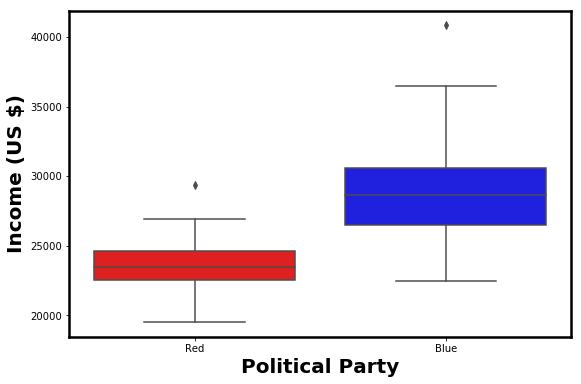

In [47]:
#sns.boxplot()
my_pal = {"Red": "r", "Blue": "b"}
fig, ax = plt.subplots(figsize=(9, 6))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.5)
sns.boxplot(x="Party", y="Income", data=df, palette=my_pal)
plt.xlabel('Political Party',weight = 'bold',size =20)
plt.ylabel('Income (US $)',weight = 'bold',size =20)

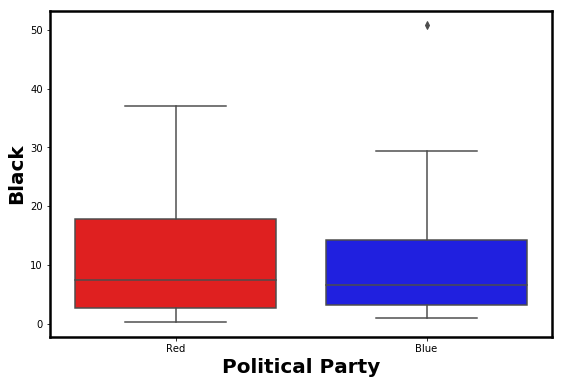

In [48]:
#sns.boxplot()
my_pal = {"Red": "r", "Blue": "b"}
fig, ax = plt.subplots(figsize=(9, 6))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.5)
sns.boxplot(x="Party", y="Black", data=df, palette=my_pal)
plt.xlabel('Political Party',weight = 'bold',size =20)
plt.ylabel('Black',weight = 'bold',size =20)


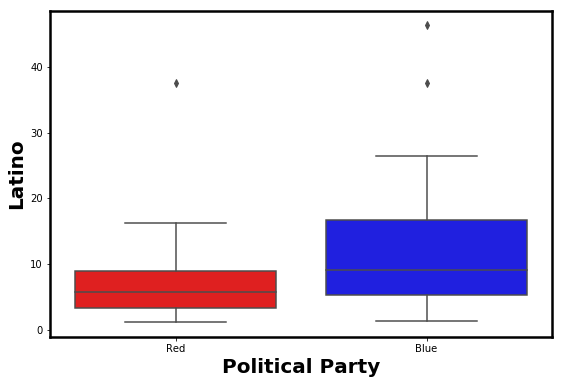

In [49]:
#sns.boxplot()
my_pal = {"Red": "r", "Blue": "b"}
fig, ax = plt.subplots(figsize=(9, 6))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.5)
sns.boxplot(x="Party", y="Latino", data=df, palette=my_pal)
plt.xlabel('Political Party',weight = 'bold',size =20)
plt.ylabel('Latino',weight = 'bold',size =20)

(0, 800)

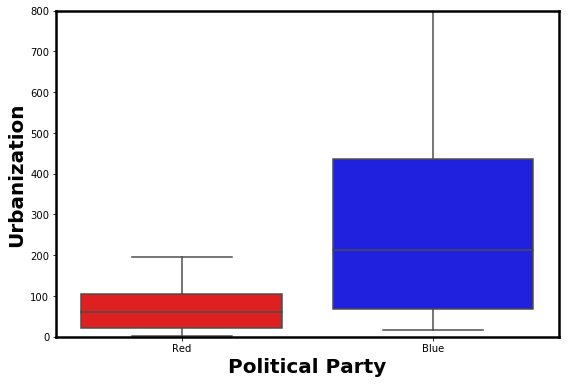

In [50]:
#sns.boxplot()
my_pal = {"Red": "r", "Blue": "b"}
fig, ax = plt.subplots(figsize=(9, 6))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.5)
sns.boxplot(x="Party", y="Urbanization", data=df, palette=my_pal)
plt.xlabel('Political Party',weight = 'bold',size =20)
plt.ylabel('Urbanization',weight = 'bold',size =20)
plt.ylim(0,800)

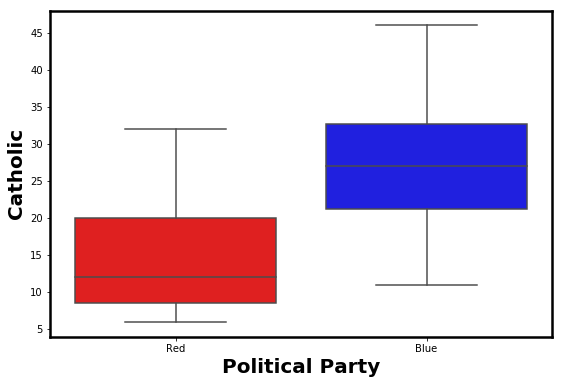

In [51]:
#sns.boxplot()
my_pal = {"Red": "r", "Blue": "b"}
fig, ax = plt.subplots(figsize=(9, 6))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.5)
sns.boxplot(x="Party", y="Catholic", data=df, palette=my_pal)
plt.xlabel('Political Party',weight = 'bold',size =20)
plt.ylabel('Catholic',weight = 'bold',size =20)

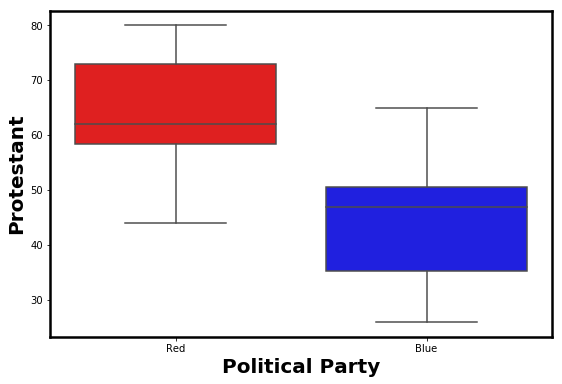

In [52]:
#sns.boxplot()
my_pal = {"Red": "r", "Blue": "b"}
fig, ax = plt.subplots(figsize=(9, 6))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.5)
sns.boxplot(x="Party", y="Protestant", data=df, palette=my_pal)
plt.xlabel('Political Party',weight = 'bold',size =20)
plt.ylabel('Protestant',weight = 'bold',size =20)

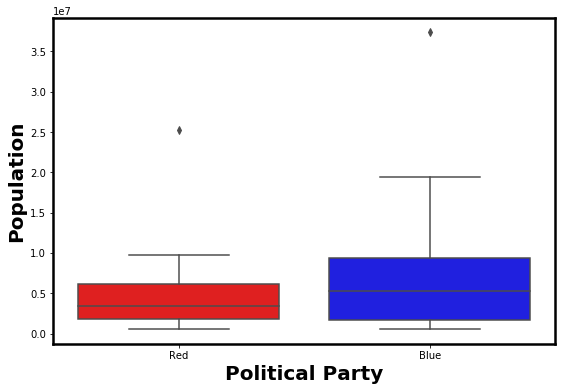

In [53]:
#sns.boxplot()
my_pal = {"Red": "r", "Blue": "b"}
fig, ax = plt.subplots(figsize=(9, 6))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.5)
sns.boxplot(x="Party", y="Population", data=df, palette=my_pal)
plt.xlabel('Political Party',weight = 'bold',size =20)
plt.ylabel('Population',weight = 'bold',size =20)

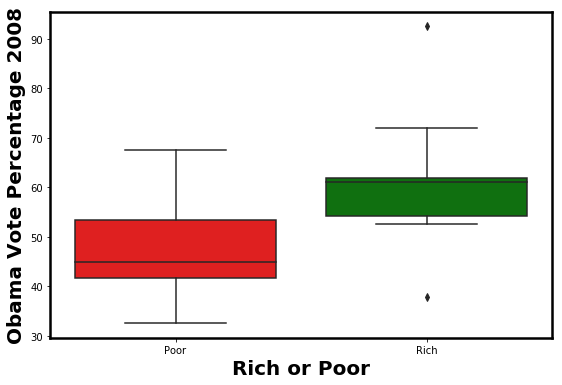

In [54]:
#sns.boxplot()
my_pal = {"Rich": "g", "Poor": "r"}
fig, ax = plt.subplots(figsize=(9, 6))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.5)
#sns.boxplot(x="Status", y="Income", data=df)
sns.boxplot(x="Status", y="Obama", data=df, palette=my_pal)
plt.xlabel('Rich or Poor',weight = 'bold',size =20)
plt.ylabel('Obama Vote Percentage 2008',weight = 'bold',size =20)

In [55]:
# BEFORE
df.Catholic.isnull().sum()

2

In [56]:
# Replace nans with mean Catholic values
df['Catholic'].fillna(df['Catholic'].mean(),inplace =  True)
#df['Catholic'].fillna(22.0,inplace =  True)

In [57]:
# AFTER
df.Catholic.isnull().sum()

0

In [58]:
# BEFORE
df.Protestant.isnull().sum()

2

In [59]:
# Replace nans with mean Catholic values
df['Protestant'].fillna(df['Protestant'].mean(),inplace =  True)

In [60]:
# AFTER
df.Protestant.isnull().sum()

0

## NOTE TO FUTURE SELF: SELECT TARGET AND PREDICTORS AFTER REPLACING NAN VALUES!

In [61]:
# create target and predictors for classification
#predictors = ['Black', 'Latino', 'Urbanization','Income']
#predictors = ['Black', 'Latino', 'Urbanization','Income','Non.religious']
#predictors = ['Urbanization','Income']
#predictors = ['Urbanization']
#predictors = ['Black','Income']
#predictors = ['Black','Income','Urbanization']
#predictors = ['Latino','Income','Urbanization']
#predictors = ['Catholic','Income','Urbanization']
#predictors = ['Black','Catholic','Income','Urbanization']
#predictors = ['Protestant','Catholic','Income','Urbanization']
predictors = ['Protestant','Income','Urbanization']
#predictors = ['Protestant','Income','Urbanization','Population']
#predictors = ['Catholic']
#predictors = ['Income']
X = df[predictors]
Y = df['Party'] # target

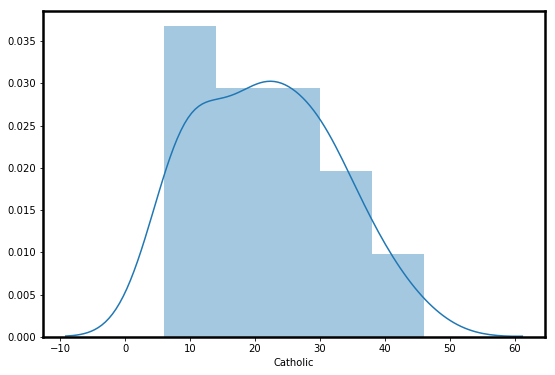

In [62]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.distplot(df.Catholic)
plt.figure(figsize = [9,6]) # [width, height]
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.5)

In [63]:
type(df.Catholic)

pandas.core.series.Series

In [64]:
df.isnull().sum()

State            0
Region           0
Obama            0
McCain           0
Turnout          4
Unemployment     0
Income           0
Population       0
Catholic         0
Protestant       0
Other            2
Non.religious    0
Black            0
Latino           0
Urbanization     0
Party            0
Party_Label      0
Status           0
dtype: int64

In [65]:
df.dtypes

State             object
Region            object
Obama            float64
McCain           float64
Turnout          float64
Unemployment     float64
Income             int64
Population         int64
Catholic         float64
Protestant       float64
Other            float64
Non.religious    float64
Black            float64
Latino           float64
Urbanization     float64
Party             object
Party_Label        int64
Status            object
dtype: object

## LOGISTIC REGRESSION

In [66]:
predictors = ['Protestant','Income','Urbanization']
X = df[predictors]
Y = df['Party_Label'] # target
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)
# Instantiate Logistic Regression Model
lr = LogisticRegression(C=100.0, random_state = 1)
# build the model using training data
lr.fit(X_train, y_train)
score = lr.score(X_test,y_test)
print(score)

1.0


## CONFUSION MATRIX FOR LOGISTIC REGRESSION CLASSIFICATION

In [67]:
# Generate Confusion Matrix for Logistic Regression
actual = y_test
predictions = lr.predict(X_test)
#results = confusion_matrix(actual, predictions) 
print(predictions)
print()
cm = confusion_matrix(actual,predictions)
print(cm)

[0 0 0 0 1 0 0 1 0 1 0]

[[8 0]
 [0 3]]


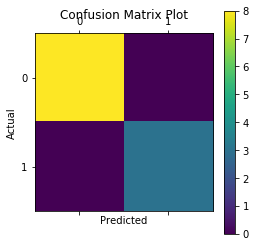

In [68]:
# Nice plot of confusion matrix
# from https://www.kaggle.com/jprakashds/confusion-matrix-in-python-binary-class

plt.matshow(cm)
plt.title('Confusion Matrix Plot')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.figure(figsize = [9,6]) # [width, height]
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.5)
#plt.matshow(cm)
plt.show()

## ROC CURVE

In [69]:
# Useful link:  https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
y_pred = lr.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0])

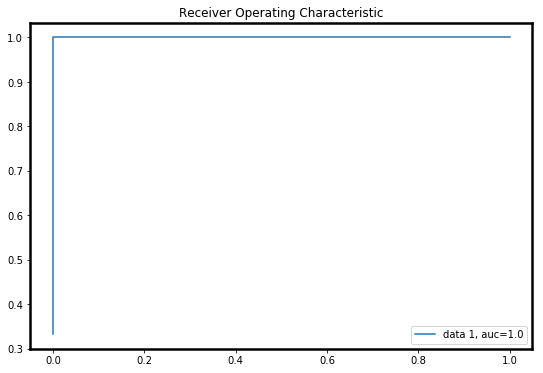

In [70]:
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

fig, ax = plt.subplots(figsize=(9, 6))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.5)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title('Receiver Operating Characteristic')
plt.legend(loc=4)
plt.show()

In [71]:
# Create a logistic regression object: reg
reg = LogisticRegression(C=100.0, random_state = 1)

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg,X,Y, cv= 5)

In [72]:
# Print the 5-fold cross-validation scores R Squared scores in this case
print(cv_scores)

print("Average 5-Fold CV Score Using Logistic Regression: {}".format(np.mean(cv_scores)))

[ 0.81818182  0.90909091  1.          0.8         0.88888889]
Average 5-Fold CV Score Using Logistic Regression: 0.8832323232323234


## CLASSIFICATION WITH KNN, SVM, NAIVE BAYES METHODS

In [73]:
# And, now for the KNN classification algorithm
# instantiate learning model (k = 7)
knn = KNeighborsClassifier(n_neighbors=7)
# Compute 5-fold cross-validation scores: cv_scores
knn_cv_scores = cross_val_score(knn,X,Y, cv= 5)

In [74]:
# Print the 5-fold cross-validation scores R Squared scores in this case
print(knn_cv_scores)

print("Average 5-Fold CV Score Using KNN: {}".format(np.mean(knn_cv_scores)))

[ 0.72727273  0.72727273  0.9         0.8         0.88888889]
Average 5-Fold CV Score Using KNN: 0.8086868686868687


In [75]:
# And, now for a Linear SVC classification algorithm
# instantiate SVM classifier
svc = LinearSVC()
# Compute 5-fold cross-validation scores: cv_scores
svc_cv_scores = cross_val_score(svc,X,Y, cv= 5)

# Print the 5-fold cross-validation scores R Squared scores in this case
print(svc_cv_scores)

print("Average 5-Fold CV Score Using SVM Linear Model: {}".format(np.mean(svc_cv_scores)))

[ 0.54545455  0.54545455  0.5         0.5         0.55555556]
Average 5-Fold CV Score Using SVM Linear Model: 0.5292929292929293


In [76]:
svc

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [77]:
##Create a Gaussian Classifier
GNB = GaussianNB()
# Compute 5-fold cross-validation scores: cv_scores
GNB_cv_scores = cross_val_score(GNB,X,Y, cv= 5)

In [78]:
# Print the 5-fold cross-validation scores R Squared scores in this case
print(GNB_cv_scores)

print("Average 5-Fold CV Score Using Gaussian Naive Bayes: {}".format(np.mean(GNB_cv_scores)))

[ 0.81818182  0.81818182  0.9         0.8         0.88888889]
Average 5-Fold CV Score Using Gaussian Naive Bayes: 0.845050505050505


In [79]:
# Instantiate a Decistion Tree Classifier
tree = DecisionTreeClassifier()

In [80]:
# Compute 5-fold cross-validation scores: cv_scores
tree_cv_scores = cross_val_score(tree,X,Y, cv= 5)
# Print the 5-fold cross-validation scores 
print(tree_cv_scores)

print("Average 5-Fold CV Score Using Decision Tree: {}".format(np.mean(tree_cv_scores)))

[ 0.90909091  0.72727273  0.9         0.9         0.77777778]
Average 5-Fold CV Score Using Decision Tree: 0.8428282828282828


## CLASSIFICATION BY VOTING USING ALL 3 CLASSIFIERS: LOGISTIC REG, KNN, GAUSSIAN NAIVE BAYES, DECISION TREE

In [81]:
# useful link: https://machinelearningmastery.com/ensemble-machine-learning-algorithms-python-scikit-learn/
# create the sub models
kfold = 5
estimators = []
model1 = LogisticRegression()
#model1 = DecisionTreeClassifier()
estimators.append(('log', model1))
model2 = DecisionTreeClassifier()
#model2 = KNeighborsClassifier(n_neighbors=7)
#estimators.append(('knn', model2))
estimators.append(('tree', model2))
model3 = GaussianNB()
estimators.append(('gnb', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())
# Note ~ 87% accuracy by votingClassifier when using Black, Urbanization & Income as predictors
# Note ~ 85% accuracy by votingClassifier when using Latino, Urbanization & Income as predictors

0.865050505051


In [82]:
estimators

[('log',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
            penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
            verbose=0, warm_start=False)),
 ('tree',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=None,
              splitter='best')),
 ('gnb', GaussianNB(priors=None))]

In [83]:
df.columns

Index(['State', 'Region', 'Obama', 'McCain', 'Turnout', 'Unemployment',
       'Income', 'Population', 'Catholic', 'Protestant', 'Other',
       'Non.religious', 'Black', 'Latino', 'Urbanization', 'Party',
       'Party_Label', 'Status'],
      dtype='object')

In [84]:
# Save result df as as csv file for future use!
df.to_csv("obama_2008.csv", index = False)

In [85]:
obama = pd.read_csv("obama_2008.csv")

In [86]:
obama.head()

,State,Region,Obama,McCain,Turnout,Unemployment,Income,Population,Catholic,Protestant,Other,Non.religious,Black,Latino,Urbanization,Party,Party_Label,Status
0,Alabama,IV,38.74,60.32,61.6,5.9,22732,4802982,6.000000,80.000000,1.0,11.000000,26.2,3.9,94.4,Red,0,Poor
1,Alaska,X,37.89,59.42,68.0,6.6,29382,721523,21.673469,53.836735,NaN,16.040816,3.3,5.5,1.2,Red,0,Rich
2,Arizona,IX,44.91,53.39,55.7,7.1,25203,6412700,29.000000,44.000000,5.0,17.000000,4.1,16.3,56.3,Red,0,Poor
3,Arkansas,VI,38.86,58.72,53.1,5.8,20977,2926229,8.000000,79.000000,1.0,8.000000,14.4,6.4,56.0,Red,0,Poor
4,California,IX,60.94,36.91,62.0,8.2,29020,37341989,37.000000,35.000000,5.0,18.000000,6.2,37.6,239.1,Blue,1,Rich


In [87]:
obama.columns

Index(['State', 'Region', 'Obama', 'McCain', 'Turnout', 'Unemployment',
       'Income', 'Population', 'Catholic', 'Protestant', 'Other',
       'Non.religious', 'Black', 'Latino', 'Urbanization', 'Party',
       'Party_Label', 'Status'],
      dtype='object')